All libraries imported successfully!


Generating unsupervised split: 100%|██████████████████████████████████| 50000/50000 [00:00<00:00, 267782.84 examples/s]


✓ Dataset downloaded successfully!
  - Training samples: 25000
  - Test samples: 25000

DATA EXPLORATION

1. First 5 reviews:
                                                text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0

2. Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None

3. Missing Values:
text     0
label    0
dtype: int64

4. Sentiment Distribution:
label
0    12500
1    12500
Name: count, dtype: int64

5. Review Length Statistics:
       review

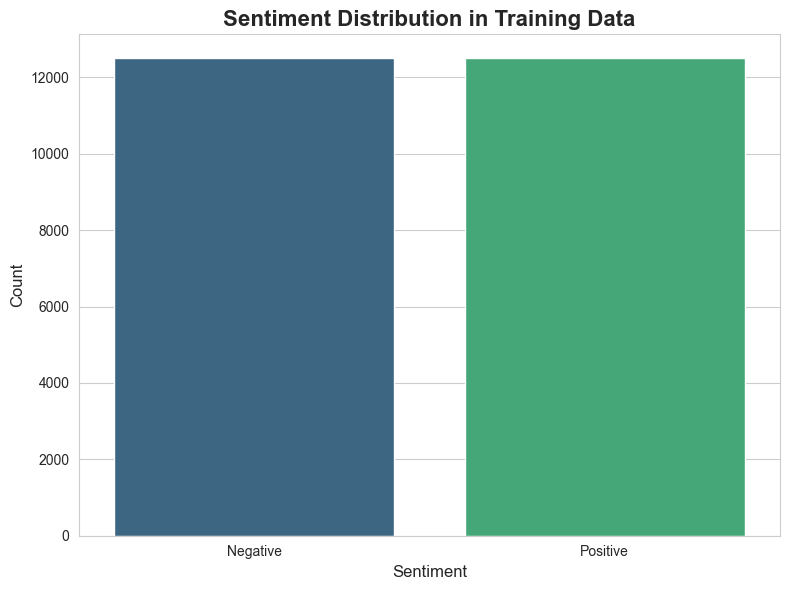

✓ Saved: review_length_analysis.png


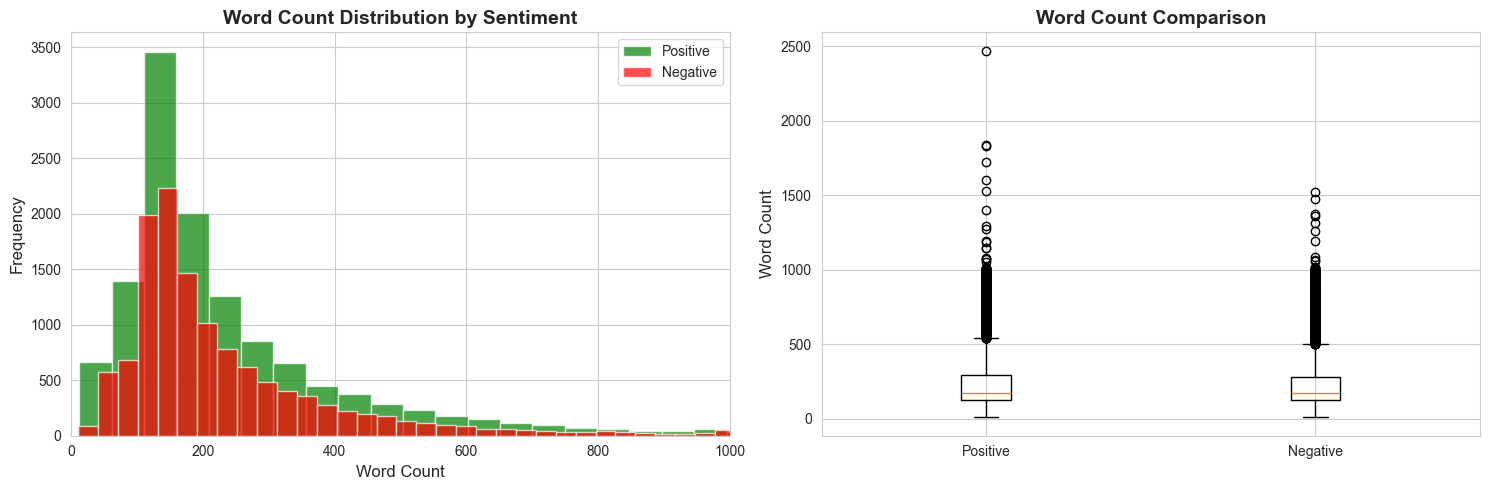


Generating Word Clouds (this may take a moment)...
✓ Saved: wordclouds.png


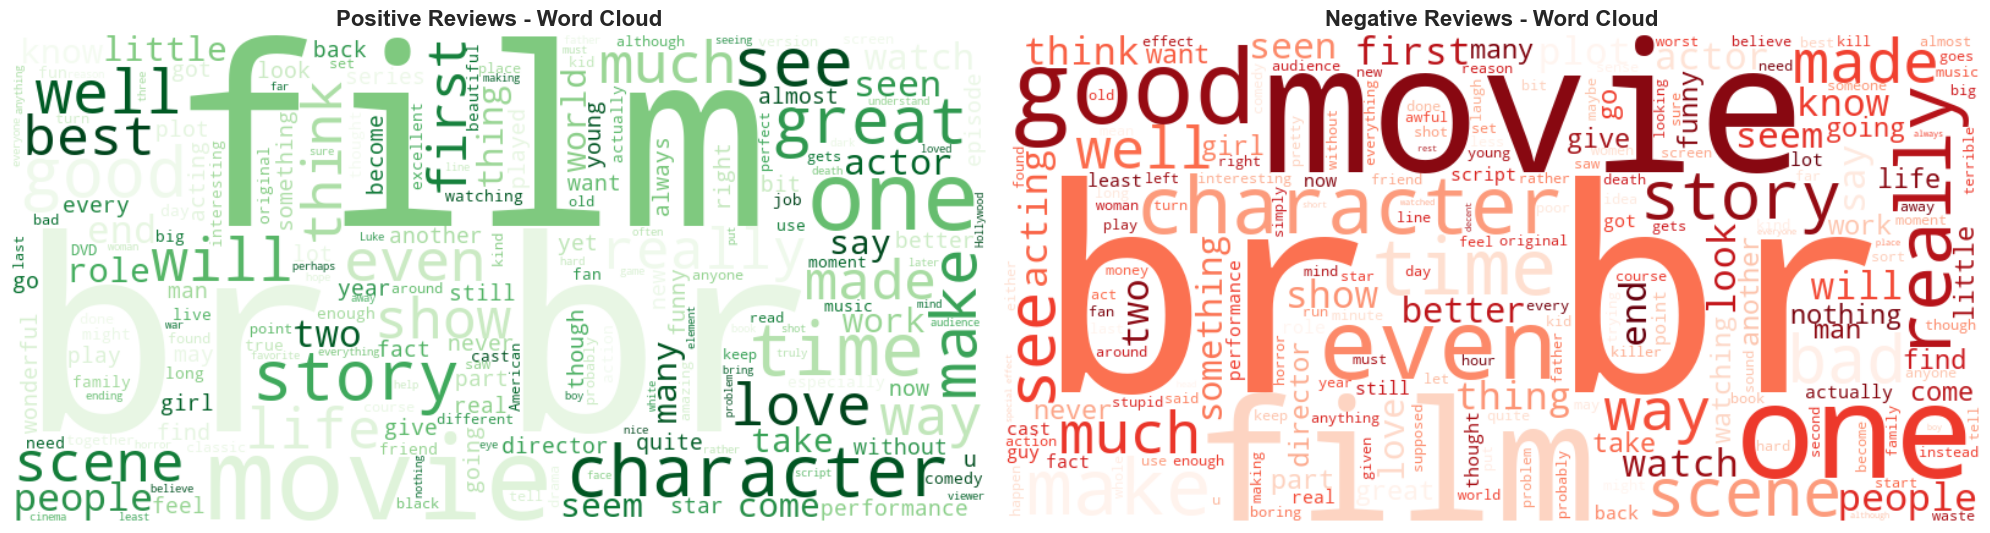


SAMPLE REVIEWS

Positive Review Example:
--------------------------------------------------------------------------------
Zentropa has much in common with The Third Man, another noir-like film set among the rubble of postwar Europe. Like TTM, there is much inventive camera work. There is an innocent American who gets emotionally involved with a woman he doesn't really understand, and whose naivety is all the more striking in contrast with the natives.<br /><br />But I'd have to say that The Third Man has a more well-crafted storyline. Zentropa is a bit disjointed in this respect. Perhaps this is intentional: it is ...


Negative Review Example:
--------------------------------------------------------------------------------
I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films co

In [1]:
# Sentiment Analysis - Data Loading and Exploratory Data Analysis
# Author: Your Name
# Date: January 2026

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("All libraries imported successfully!")

# ============================================================================
# STEP 1: DOWNLOAD AND LOAD THE DATASET
# ============================================================================

# Download IMDB dataset
# We'll load it directly from a source or you can download from Kaggle
# For now, let's create a function to load the data

def download_imdb_dataset():
    """
    Downloads IMDB dataset using datasets library
    Alternative: Download manually from Kaggle and place in data/ folder
    """
    try:
        from datasets import load_dataset
        print("Downloading IMDB dataset...")
        dataset = load_dataset("imdb")
        
        # Convert to pandas DataFrame
        train_df = pd.DataFrame(dataset['train'])
        test_df = pd.DataFrame(dataset['test'])
        
        # Save to CSV
        train_df.to_csv('../data/imdb_train.csv', index=False)
        test_df.to_csv('../data/imdb_test.csv', index=False)
        
        print(f"✓ Dataset downloaded successfully!")
        print(f"  - Training samples: {len(train_df)}")
        print(f"  - Test samples: {len(test_df)}")
        
        return train_df, test_df
    
    except ImportError:
        print("datasets library not found. Installing...")
        import subprocess
        subprocess.check_call(['pip', 'install', 'datasets'])
        return download_imdb_dataset()

# Download the dataset
train_df, test_df = download_imdb_dataset()

# ============================================================================
# STEP 2: EXPLORE THE DATA
# ============================================================================

print("\n" + "="*80)
print("DATA EXPLORATION")
print("="*80)

# Display first few rows
print("\n1. First 5 reviews:")
print(train_df.head())

# Dataset info
print("\n2. Dataset Information:")
print(train_df.info())

# Check for missing values
print("\n3. Missing Values:")
print(train_df.isnull().sum())

# Label distribution
print("\n4. Sentiment Distribution:")
print(train_df['label'].value_counts())

# Convert labels to meaningful names
train_df['sentiment'] = train_df['label'].map({0: 'Negative', 1: 'Positive'})
test_df['sentiment'] = test_df['label'].map({0: 'Negative', 1: 'Positive'})

# Review length statistics
train_df['review_length'] = train_df['text'].apply(lambda x: len(x))
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))

print("\n5. Review Length Statistics:")
print(train_df[['review_length', 'word_count']].describe())

# ============================================================================
# STEP 3: VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("CREATING VISUALIZATIONS")
print("="*80)

# 1. Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution in Training Data', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('../data/sentiment_distribution.png', dpi=300, bbox_inches='tight')
print("✓ Saved: sentiment_distribution.png")
plt.show()

# 2. Review Length Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(train_df[train_df['sentiment']=='Positive']['word_count'], 
             bins=50, alpha=0.7, label='Positive', color='green')
axes[0].hist(train_df[train_df['sentiment']=='Negative']['word_count'], 
             bins=50, alpha=0.7, label='Negative', color='red')
axes[0].set_xlabel('Word Count', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Word Count Distribution by Sentiment', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].set_xlim(0, 1000)

axes[1].boxplot([train_df[train_df['sentiment']=='Positive']['word_count'],
                  train_df[train_df['sentiment']=='Negative']['word_count']],
                 labels=['Positive', 'Negative'])
axes[1].set_ylabel('Word Count', fontsize=12)
axes[1].set_title('Word Count Comparison', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/review_length_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: review_length_analysis.png")
plt.show()

# 3. Word Clouds
print("\nGenerating Word Clouds (this may take a moment)...")

# Combine all positive reviews
positive_text = ' '.join(train_df[train_df['sentiment']=='Positive']['text'].head(1000))
# Combine all negative reviews
negative_text = ' '.join(train_df[train_df['sentiment']=='Negative']['text'].head(1000))

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Positive word cloud
wordcloud_pos = WordCloud(width=800, height=400, 
                          background_color='white',
                          colormap='Greens').generate(positive_text)
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].set_title('Positive Reviews - Word Cloud', fontsize=16, fontweight='bold')
axes[0].axis('off')

# Negative word cloud
wordcloud_neg = WordCloud(width=800, height=400, 
                          background_color='white',
                          colormap='Reds').generate(negative_text)
axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].set_title('Negative Reviews - Word Cloud', fontsize=16, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.savefig('../data/wordclouds.png', dpi=300, bbox_inches='tight')
print("✓ Saved: wordclouds.png")
plt.show()

# ============================================================================
# STEP 4: SAMPLE REVIEWS
# ============================================================================

print("\n" + "="*80)
print("SAMPLE REVIEWS")
print("="*80)

print("\nPositive Review Example:")
print("-" * 80)
sample_pos = train_df[train_df['sentiment']=='Positive']['text'].iloc[0]
print(sample_pos[:500] + "...")

print("\n\nNegative Review Example:")
print("-" * 80)
sample_neg = train_df[train_df['sentiment']=='Negative']['text'].iloc[0]
print(sample_neg[:500] + "...")

# ============================================================================
# STEP 5: SAVE PROCESSED DATA
# ============================================================================

print("\n" + "="*80)
print("SAVING DATA")
print("="*80)

# Save processed data with sentiment labels
train_df[['text', 'sentiment', 'label']].to_csv('../data/train_processed.csv', index=False)
test_df[['text', 'sentiment', 'label']].to_csv('../data/test_processed.csv', index=False)

print("✓ Saved processed training data to: data/train_processed.csv")
print("✓ Saved processed test data to: data/test_processed.csv")

print("\n" + "="*80)
print("DATA EXPLORATION COMPLETE!")
print("="*80)
print("\nNext Steps:")
print("1. Data Preprocessing (cleaning, tokenization)")
print("2. Feature Engineering (TF-IDF, Word Embeddings)")
print("3. Model Training")
print("="*80)
print("All libraries imported successfully 🎉")
